## Project 2 - DATA 201 / Hye Young Park
Date: 11/17/2019

In [99]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import time
import seaborn as sns
import sklearn

### Load the CSV File, view it and check the type and information.
- Referrence: Maryland Crime Data by County from 1975-2016: Violent Crime statistics by county from Kaggle
 https://www.kaggle.com/kevin2k1503/maryland-crime-data-by-county-from-19752016


In [100]:
data = pd.read_csv('C:/Users/illya/Desktop/DATA 201 - Fall 2019/Project 2/MDcrime.csv')
print(data)
type(data)
data.info()

          JURISDICTION      YEAR  POPULATION  MURDER  RAPE  ROBBERY  \
0      Allegany County  1/1/1975       79655       3     5       20   
1      Allegany County  1/1/1976       83923       2     2       24   
2      Allegany County  1/1/1977       82102       3     7       32   
3      Allegany County  1/1/1978       79966       1     2       18   
4      Allegany County  1/1/1979       79721       1     7       18   
5      Allegany County  1/1/1980       80461       2    12       26   
6      Allegany County  1/1/1981       81781      11    13       24   
7      Allegany County  1/1/1982       81858       1    18       18   
8      Allegany County  1/1/1983       82605       5     9       19   
9      Allegany County  1/1/1984       80835       2    15        6   
10     Allegany County  1/1/1985       77655       0     7       12   
11     Allegany County  1/1/1986       78947       1    11       12   
12     Allegany County  1/1/1987       75697       2     9       22   
13    

In [101]:
# get rid of uninteresting columns
data.drop(data.iloc[:, 18:38], axis=1,inplace=True)

Filter the dataset from 2006 to 2016 (10 years)

In [102]:
twenty_six = time.strptime('1/1/06', '%d/%m/%y')
print(twenty_six)
data['YEAR'] = pd.to_datetime(data['YEAR'])
data = data[(data['YEAR'].dt.year >= twenty_six.tm_year)]
print(data)

time.struct_time(tm_year=2006, tm_mon=1, tm_mday=1, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=6, tm_yday=1, tm_isdst=-1)
              JURISDICTION       YEAR  POPULATION  MURDER  RAPE  ROBBERY  \
31         Allegany County 2006-01-01       73841       1    29       37   
32         Allegany County 2007-01-01       71977       0    20       35   
33         Allegany County 2008-01-01       71806       1    17       34   
34         Allegany County 2009-01-01       72312       1    25       38   
35         Allegany County 2010-01-01       72721       4    26       48   
36         Allegany County 2011-01-01       75799       6    30       62   
37         Allegany County 2012-01-01       75413       3    22       42   
38         Allegany County 2013-01-01       73834       4    28       63   
39         Allegany County 2014-01-01       73299       2    15       31   
40        Allegany County  2015-01-01       72230       3    24       58   
41        Allegany County  2016-01-01       71

In [103]:
datagroup = data.groupby('JURISDICTION')['GRAND TOTAL'].sum()
datagroup.head()

JURISDICTION
Allegany County          23750
Allegany County           4809
Anne Arundel County     169514
Anne Arundel County      30047
Baltimore City          440914
Name: GRAND TOTAL, dtype: int64

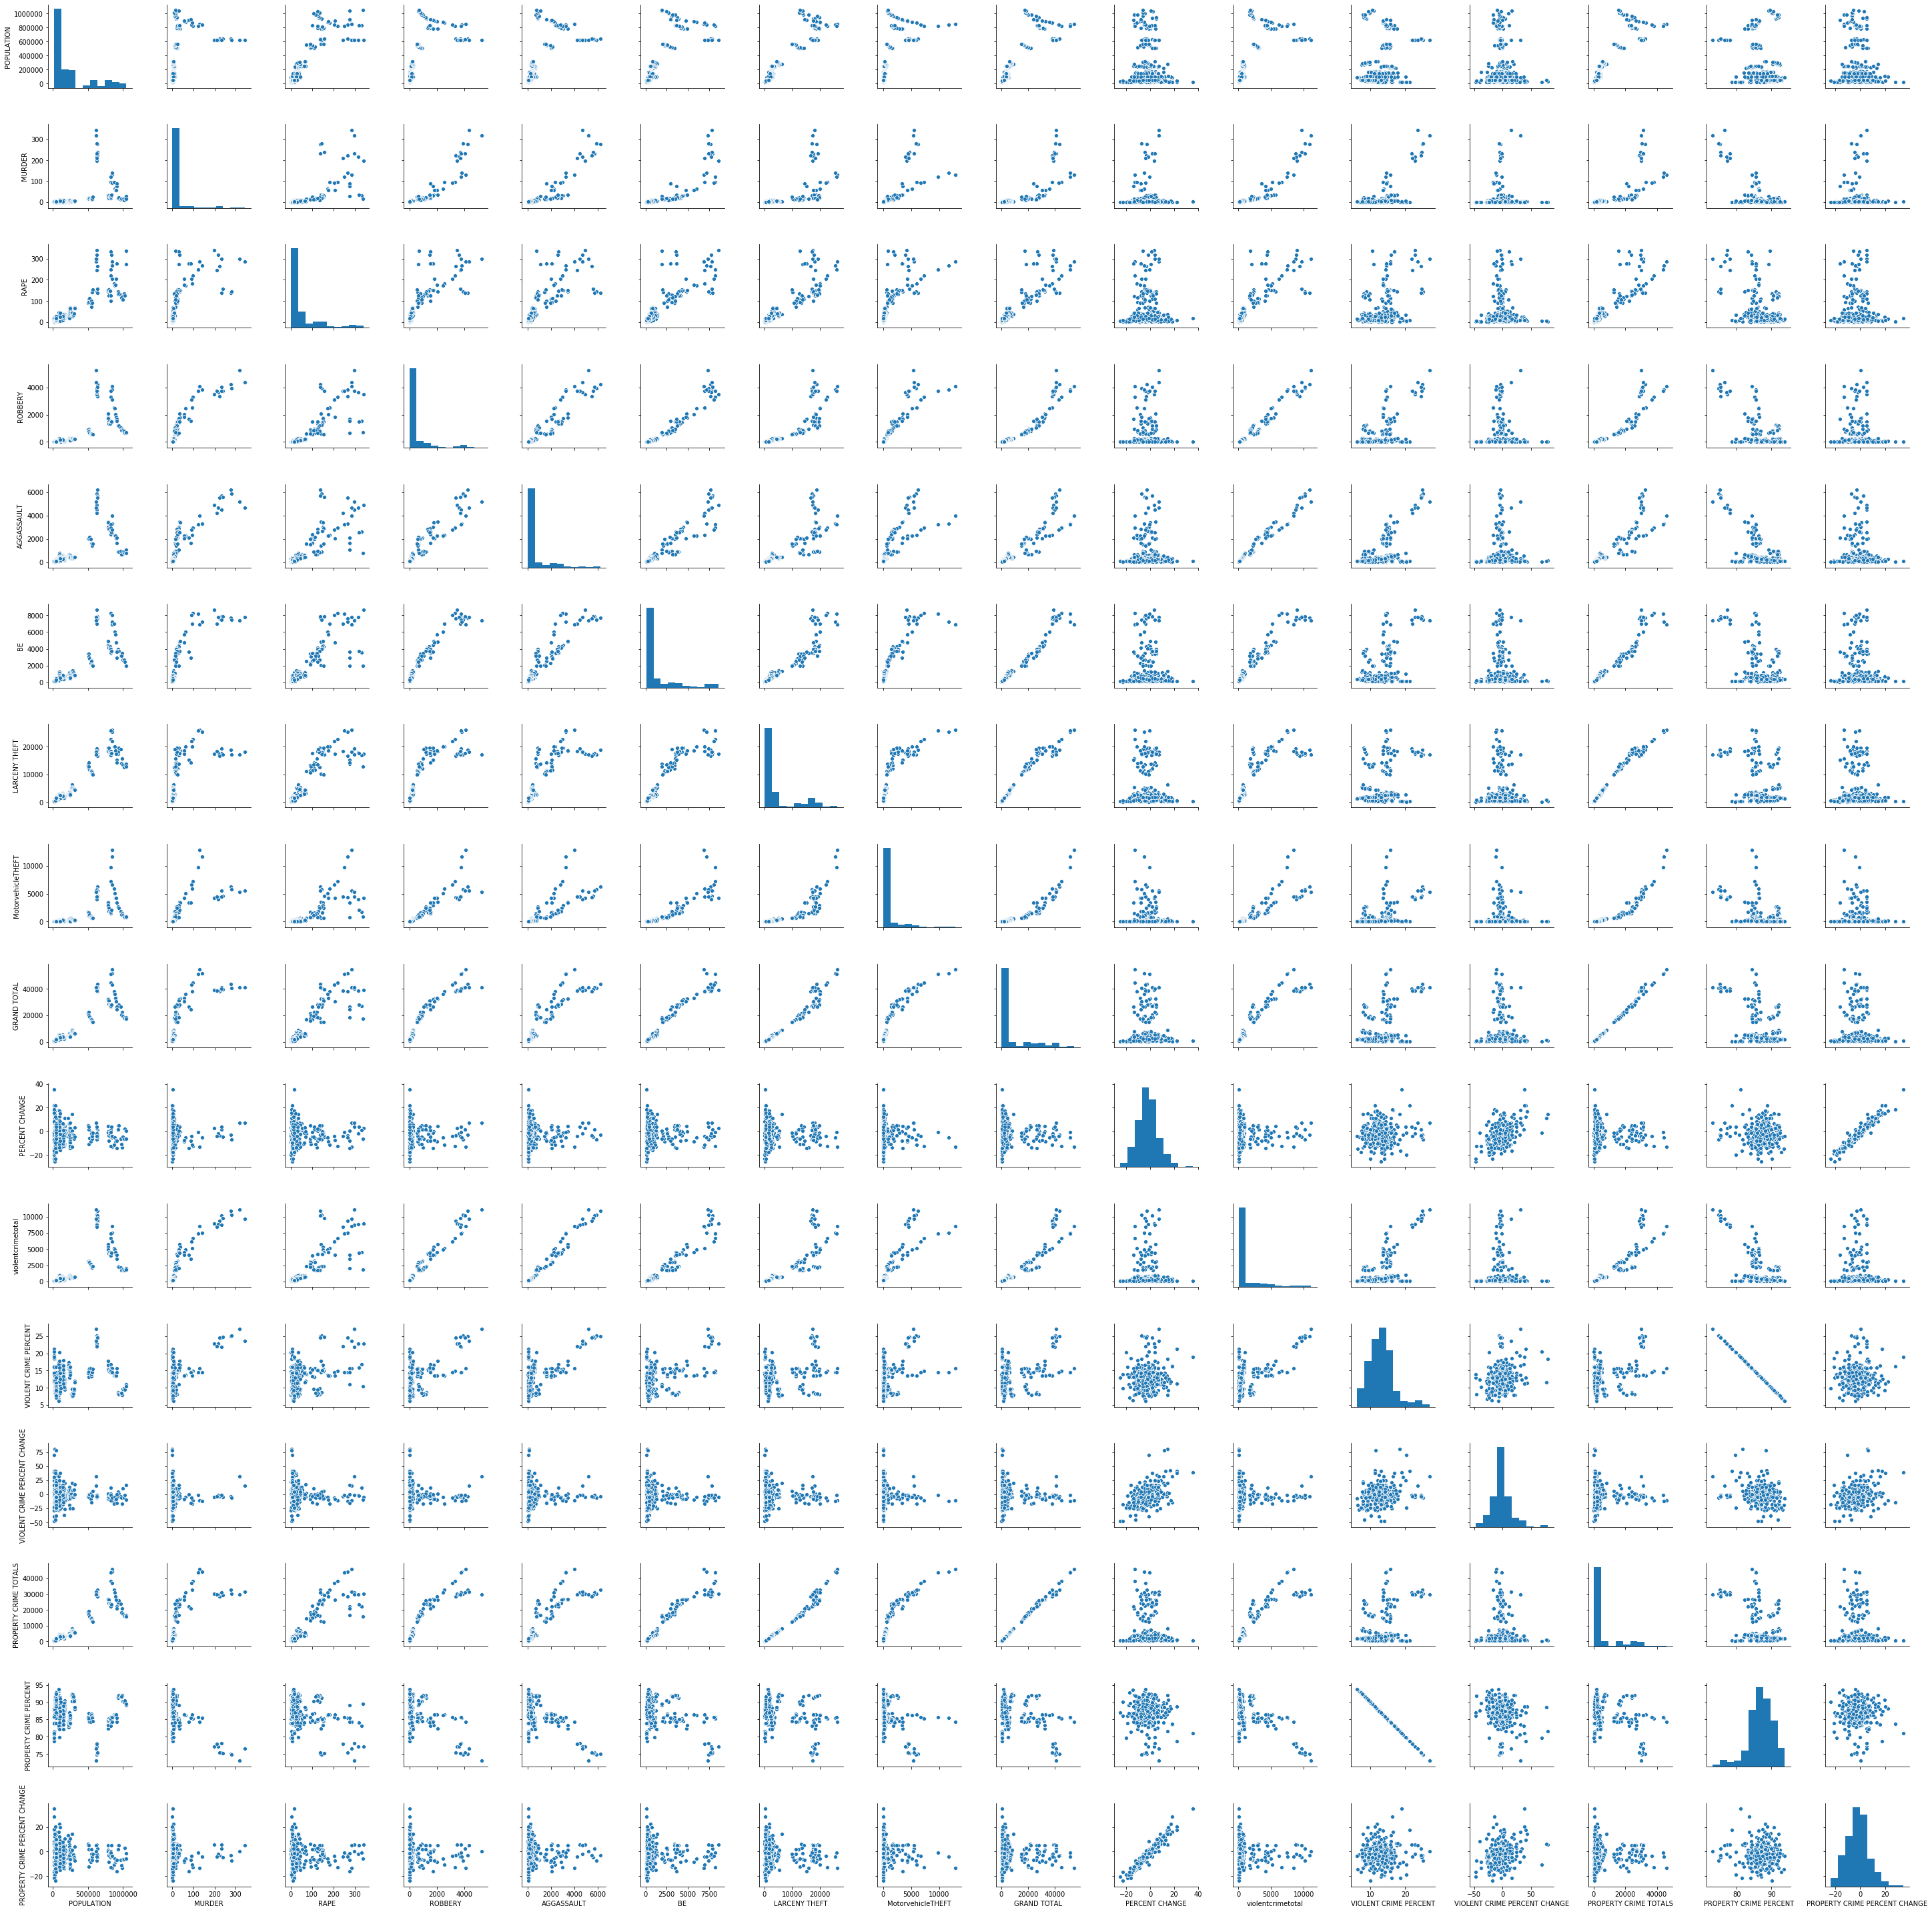

In [104]:
sns.pairplot(data)

Look at the histogram 
y axis is density and not probability. If you multiply the y-axis by the bar, you will get probability and it will sum to 1.

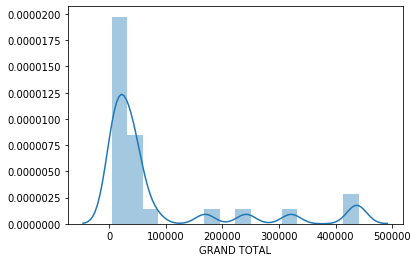

In [105]:
sns.distplot(datagroup)

###  Scikitlearn Linear Regression
#### Split Data into training and test datasets

In [106]:
data1 = data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, yTrain, yTest = train_test_split( predictors, target, test_size=0.25(default), random_state=9(seed))
: Train is predicted data and Test is your actual data that is used to train the model

We want to see the effects of Break and Enters(BE) on Robbery.
We reshape to make them the same shape so we can use it in graphs later.

In [107]:
X = data1['ROBBERY']    
y = data1['BE']
X = X.values.reshape(len(X),1)
y = y.values.reshape(len(y),1)


Now we test, train, and split the chosen data

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)

In [110]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

Check the size of the training and testing data (0.5 of total 264 rows)

In [111]:
X_train.shape, y_train.shape

((132, 1), (132, 1))

In [112]:
X_test.shape, y_test.shape

((132, 1), (132, 1))

Fit the training data to a linear model

In [113]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Then we use the model to predict the test data

In [114]:
y_predicted = lm.predict(X_test)

In [115]:
print(X_test) #Robberies

[[ 187]
 [  42]
 [ 111]
 [ 153]
 [3831]
 [  18]
 [ 810]
 [  34]
 [  14]
 [  21]
 [5288]
 [   2]
 [  19]
 [1368]
 [  23]
 [  18]
 [ 148]
 [   9]
 [ 104]
 [ 259]
 [ 147]
 [  42]
 [ 247]
 [  28]
 [ 176]
 [ 121]
 [ 910]
 [  25]
 [  16]
 [  33]
 [  31]
 [2090]
 [  17]
 [  39]
 [1261]
 [  48]
 [4094]
 [ 147]
 [1512]
 [   3]
 [2545]
 [  22]
 [   1]
 [ 113]
 [ 878]
 [   9]
 [ 661]
 [4378]
 [ 211]
 [  10]
 [  40]
 [ 158]
 [  20]
 [  14]
 [  30]
 [1787]
 [3324]
 [ 165]
 [  47]
 [ 975]
 [ 121]
 [1341]
 [ 198]
 [ 698]
 [ 152]
 [ 115]
 [  42]
 [1730]
 [   5]
 [ 107]
 [  55]
 [  15]
 [ 139]
 [ 812]
 [3726]
 [3765]
 [4260]
 [1525]
 [  21]
 [  45]
 [ 202]
 [  22]
 [ 155]
 [  34]
 [ 215]
 [   5]
 [  21]
 [  15]
 [  56]
 [ 116]
 [1704]
 [  90]
 [  11]
 [ 204]
 [  28]
 [  23]
 [   8]
 [1062]
 [  22]
 [  40]
 [ 597]
 [ 141]
 [  13]
 [ 228]
 [  17]
 [ 878]
 [1189]
 [  27]
 [ 630]
 [  21]
 [ 222]
 [ 154]
 [  40]
 [ 111]
 [  35]
 [1498]
 [  38]
 [ 245]
 [  58]
 [  61]
 [1471]
 [ 212]
 [  15]
 [  19]
 [ 185]


In [116]:
print(y_test) #BE

[[ 753]
 [ 424]
 [1001]
 [ 809]
 [7188]
 [ 291]
 [3419]
 [ 211]
 [ 144]
 [ 113]
 [7399]
 [ 158]
 [ 163]
 [4079]
 [ 263]
 [ 270]
 [ 507]
 [ 147]
 [ 809]
 [1376]
 [ 834]
 [ 439]
 [1242]
 [ 356]
 [ 767]
 [ 569]
 [3412]
 [ 148]
 [ 161]
 [ 517]
 [ 413]
 [4812]
 [ 187]
 [ 219]
 [3932]
 [ 596]
 [6903]
 [ 704]
 [3493]
 [ 156]
 [6985]
 [ 247]
 [ 142]
 [ 625]
 [3203]
 [ 165]
 [2860]
 [7803]
 [1036]
 [ 115]
 [ 486]
 [ 786]
 [ 181]
 [ 126]
 [ 214]
 [4949]
 [8219]
 [ 633]
 [ 567]
 [3486]
 [ 809]
 [4119]
 [ 756]
 [1961]
 [ 967]
 [ 692]
 [ 536]
 [4448]
 [ 171]
 [ 591]
 [ 409]
 [ 139]
 [ 396]
 [2728]
 [7856]
 [8209]
 [7664]
 [3587]
 [ 202]
 [ 435]
 [ 714]
 [ 400]
 [ 977]
 [ 517]
 [1110]
 [ 153]
 [ 271]
 [ 238]
 [ 562]
 [ 701]
 [3667]
 [ 614]
 [ 268]
 [1032]
 [ 328]
 [ 227]
 [ 169]
 [3142]
 [ 100]
 [ 523]
 [2259]
 [ 742]
 [ 210]
 [ 809]
 [ 163]
 [2685]
 [3708]
 [ 381]
 [2522]
 [ 337]
 [1393]
 [ 741]
 [ 597]
 [1187]
 [ 536]
 [3695]
 [ 611]
 [1155]
 [ 486]
 [ 712]
 [4316]
 [1097]
 [ 194]
 [ 312]
 [ 598]


In [117]:
print(y_predicted) #predicted BEs based on robberies

[[  794.72027149]
 [  491.84358417]
 [  635.97111124]
 [  723.70091033]
 [ 8406.32474472]
 [  441.7122704 ]
 [ 2096.04562463]
 [  475.13314625]
 [  433.35705144]
 [  447.97868462]
 [11449.71325117]
 [  408.29139456]
 [  443.80107514]
 [ 3261.59866965]
 [  452.1562941 ]
 [  441.7122704 ]
 [  713.25688663]
 [  422.91302774]
 [  621.34947806]
 [  945.11421279]
 [  711.16808189]
 [  491.84358417]
 [  920.0485559 ]
 [  462.6003178 ]
 [  771.74341935]
 [  656.85915864]
 [ 2304.92609865]
 [  456.33390358]
 [  437.53466092]
 [  473.04434151]
 [  468.86673202]
 [ 4769.71569206]
 [  439.62346566]
 [  485.57716995]
 [ 3038.09656245]
 [  504.37641261]
 [ 8955.68039139]
 [  711.16808189]
 [ 3562.38655224]
 [  410.3801993 ]
 [ 5720.12184885]
 [  450.06748936]
 [  406.20258982]
 [  640.14872072]
 [ 2238.08434696]
 [  422.91302774]
 [ 1784.81371834]
 [ 9548.9009376 ]
 [  844.85158526]
 [  425.00183248]
 [  487.66597469]
 [  734.14493403]
 [  445.88987988]
 [  433.35705144]
 [  466.77792728]
 [ 4136.80

Use numpy to measure the mean square error

In [118]:
mean_sq_error = np.mean( (y_test - y_predicted) **2 )
print(mean_sq_error)

364088.36203661957


Use sklearn metrics to check that our result is the same

In [119]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_true = y_test, y_pred = lm.predict(X_test)))

364088.36203661957


Check the error on the training data

In [120]:
print(mean_squared_error(y_true = y_train, y_pred = lm.predict(X_train)))

139788.06536739986


lm.score shows us how much the model (the x variable) accounts for the variability of y around its mean. 
About 90% of the variability in Y can be explained using X

In [121]:
lm.score(X_test, y_test)

0.9131193071569756

Let's look at the histogram of our residuals (differences between actual and predicted values), we expect some form of Gaussian distribution here.

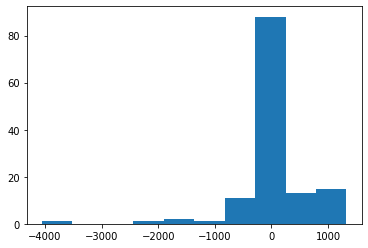

In [122]:
plt1 = plt.hist(y_test - y_predicted)

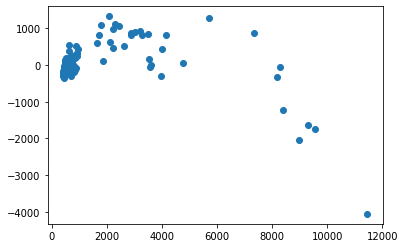

In [123]:
#looking at predicted robberies of our trained data, and plotting the residuals
plt.scatter(y_predicted, y_test - y_predicted) 

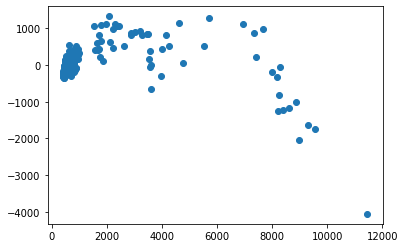

In [124]:
#look at predictions of full data set(264 rows), and plot the residuals
plt.scatter(lm.predict(X), y - lm.predict(X))

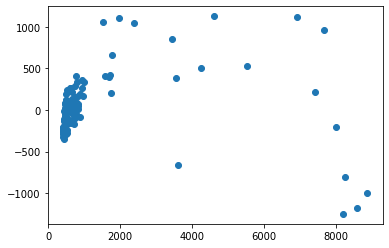

In [125]:
#if we run one more prediction on the trained data(X_train), and plot the residuals, our new trained set looks like this
plt.scatter(lm.predict(X_train), y_train - lm.predict(X_train))

<function matplotlib.pyplot.show(*args, **kw)>

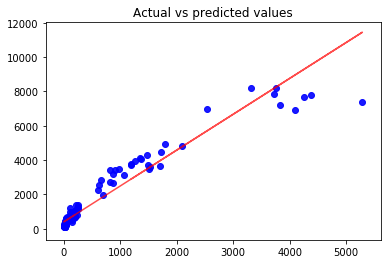

In [126]:
plt.title('Actual vs predicted values')
plt.plot(X_test, y_predicted, color = 'red', alpha = 0.7) #predicted robberies
plt.scatter(X_test, y_test, color = 'blue', alpha = 0.9) #actual robberies
plt.show

In [127]:
print(lm.coef_) 

[[2.08880474]]


In [128]:
print(lm.intercept_) # y = 2.089X + 404.114 is our regression line

[404.11378508]


In [129]:
import statsmodels.api as sm # import statsmodels 

target = pd.DataFrame(data1, columns = ["ROBBERY"]) #our target variable

X = data1["BE"] ## X usually means our input variables (or independent variables)
y = target["ROBBERY"] ## Y usually means our output/dependent variable

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output(dependent), input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                ROBBERY   R-squared (uncentered):                   0.931
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              3562.
Date:                Fri, 15 Nov 2019   Prob (F-statistic):                   6.54e-155
Time:                        16:55:54   Log-Likelihood:                         -1867.3
No. Observations:                 264   AIC:                                      3737.
Df Residuals:                     263   BIC:                                      3740.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BE             0.4312      0.007     59.682      0.000       0.417       0.445
==============================================================================
Omnibus:                      259.565   Durbin-Watson:                   0.561
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8070.004
Skew:                           3.951   Prob(JB):                         0.00
Kurtosis:                      28.908   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared shows 93.1% of our variance is explained by the model
The coef of 0.4312 means that as BE increases by 1, Robbery will increase by 0.4312, which if we take a look at the original table, there are many more BEs than there are robberies in general, so the correlation is strong.